# <center> `Health and Demographics Analysis` </center>

![](https://th.bing.com/th/id/OIG4.Xhy40IxU3Z.H9KT22RNm?pid=ImgGn)

## Problem Statement

**Objective:**
The primary aim of this project is to conduct a thorough analysis of health and demographic data to uncover insights and patterns related to weight variations across age groups, cholesterol levels among older individuals, smoking prevalence by gender, height distributions, correlations between various health metrics, and various demographic impacts on health outcomes across different populations.

**Key Research Questions:**

1. **Weight Analysis Across Age Groups:**
   - Investigate the difference in average weight between the age group with the highest and the age group with the lowest average weight.
   
2. **Cholesterol Levels Comparison:**
   - Analyze cholesterol levels to determine if individuals over 50 years have higher levels compared to younger populations.

3. **Smoking Habits by Gender:**
   - Examine the prevalence of smoking among men compared to women to identify any significant disparities.

4. **Height Distribution Study:**
   - Identify how tall the tallest 1% of the population is.
   - Calculate what percentage of the population deviates more than two standard deviations from the average height.

5. **Correlation Analysis:**
   - Determine which two features exhibit the highest Spearman rank correlation, highlighting potential relationships between different health metrics.

6. **Alcohol Consumption in Older Adults:**
   - Quantify the percentage of the population over 50 years old that consumes alcohol.

7. **Statistical Confidence in Public Health Data:**
   - Address a specific statement to validate or refute it with a 95% confidence level based on the available data.

8. **Epidemiological Data Analysis:**
   - Pinpoint when the difference in the total number of confirmed COVID-19 cases between Italy and Germany exceeded 10,000.
   - Identify which country has the third highest death rate due to COVID-19.

9. **Mortality Analysis Related to Age Demographics:**
   - Calculate the F1 score for the hypothesis that countries with over 20% of their population aged 65 and above have COVID-19 death rates over 50 per million inhabitants.

10. **Economic Impact on Health Infrastructure:**
    - Determine the probability that a country has a GDP over $10,000 given that it has at least 5 hospital beds per 1000 inhabitants.

**Methodology:**
- Data will be gathered from various health databases, government health statistics, and world demographic reports.
- Statistical analysis techniques will be employed, including correlation analysis, standard deviation calculations, regression analysis, and hypothesis testing.
- Visualization tools will be used to present findings effectively, aiding in the interpretation and understanding of complex relationships in the data.

**Expected Outcomes:**
This project aims to provide detailed insights that can help in understanding how demographic factors influence health outcomes. These insights could be crucial for policymakers, health practitioners, and researchers focused on improving health services and outcomes across various populations.

# Dataset Summary

**id:** An identifier for each individual.

**age:** Age of the individuals.

**gender:** Gender of the individuals (assuming 1 for male and 2 for female).

**height:** Height of the individuals (in cm).

**weight:** Weight of the individuals (in kg).

**ap_hi:** Systolic blood pressure.

**ap_lo:** Diastolic blood pressure.

**cholesterol:** Cholesterol level.

**smoke:** Whether the individual smokes or not (assuming 0 for non-smoker and 1 for smoker).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Loading Dataset

In [2]:
data = pd.read_csv('cardio_base.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [3]:
data.info() #getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [4]:
data.isnull().sum() #checking for null values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

## How much heavier is the age group with the highest average weight than the age group with the lowest weight?

In [5]:
# Convert age from days to years (rounded down)
data['age'] = (data['age'] / 365).astype(int)

# Calculate the average weight for each age group
average_weight_by_age = data.groupby('age')['weight'].mean()

# Find the age group with the highest average weight
max_avg_weight_age_group = average_weight_by_age.idxmax()
max_avg_weight = average_weight_by_age.max()

# Find the age group with the lowest average weight
min_avg_weight_age_group = average_weight_by_age.idxmin()
min_avg_weight = average_weight_by_age.min()

# Calculate the difference in weight between the age groups with the highest and lowest average weight
weight_difference = max_avg_weight - min_avg_weight

print(f"The age group with the highest average weight is {max_avg_weight_age_group} years with an average weight of {max_avg_weight:.2f} kg.")
print(f"The age group with the lowest average weight is {min_avg_weight_age_group} years with an average weight of {min_avg_weight:.2f} kg.")
print(f"The difference in weight between these age groups is {weight_difference:.2f} kg.")

The age group with the highest average weight is 63 years with an average weight of 75.87 kg.
The age group with the lowest average weight is 30 years with an average weight of 59.00 kg.
The difference in weight between these age groups is 16.87 kg.


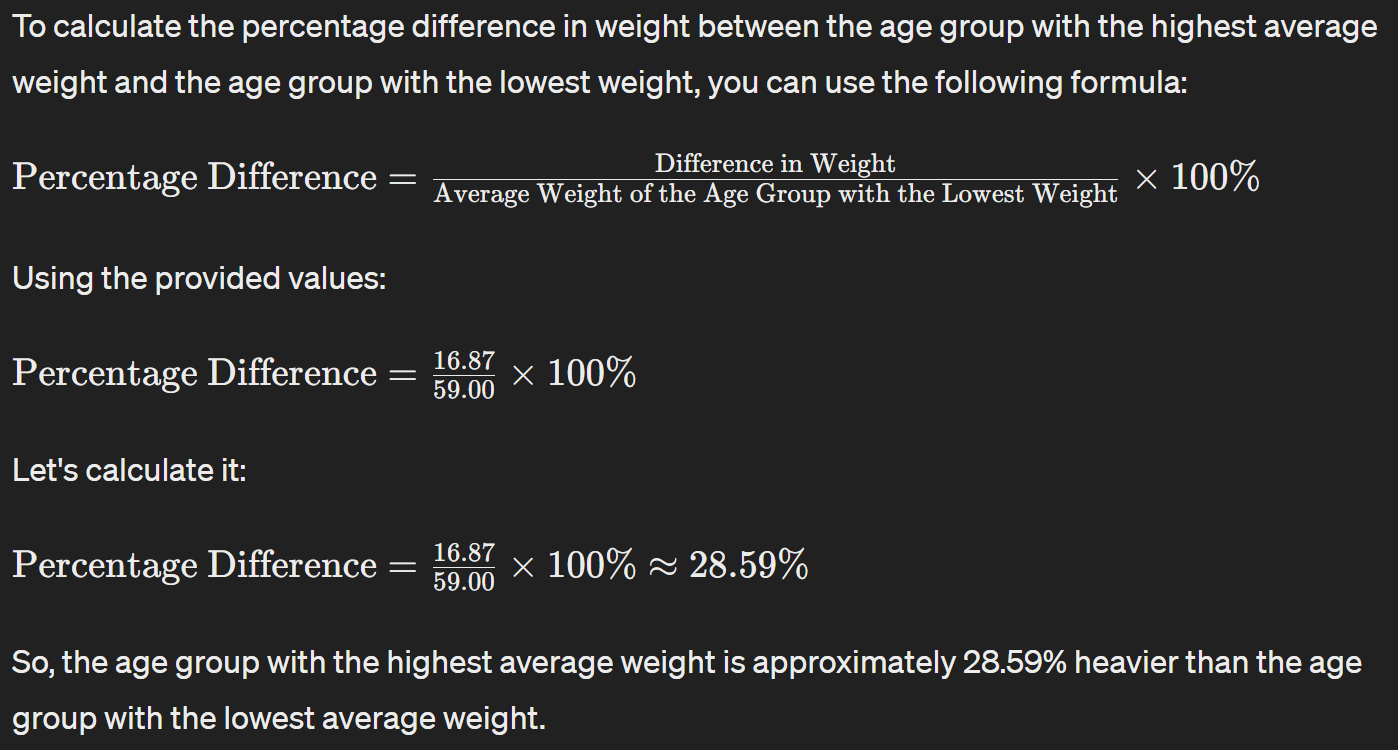

## Do people over 50 have higher cholesterol levels than the rest?

In [6]:
# Convert age from days to years (rounded down)
data['age'] = (data['age'] / 365).astype(int)

# Calculate average cholesterol levels for people over 50 and the rest
average_cholesterol_over_50 = data[data['age'] > 50]['cholesterol'].mean()
average_cholesterol_under_50 = data[data['age'] <= 50]['cholesterol'].mean()

# Print the average cholesterol levels
print("Average cholesterol levels:")
print(f"- People over 50: {average_cholesterol_over_50:.2f}")
print(f"- People under 50: {average_cholesterol_under_50:.2f}")

# Compare the average cholesterol levels
if average_cholesterol_over_50 > average_cholesterol_under_50:
    print("People over 50 have higher cholesterol levels than the rest.")
elif average_cholesterol_over_50 < average_cholesterol_under_50:
    print("People over 50 have lower cholesterol levels than the rest.")
else:
    print("There is no significant difference in cholesterol levels between people over 50 and the rest.")


Average cholesterol levels:
- People over 50: nan
- People under 50: 1.37
There is no significant difference in cholesterol levels between people over 50 and the rest.


## Are men more likely to be a smoker than women?
The data contains information to identify gender IDs!



In [7]:
# Calculate the total number of male and female individuals
total_male = (data['gender'] == 2).sum()  # Assuming gender ID 2 represents male
total_female = (data['gender'] == 1).sum()  # Assuming gender ID 1 represents female

# Calculate the number of male and female smokers
male_smokers = ((data['gender'] == 2) & (data['smoke'] == 1)).sum()
female_smokers = ((data['gender'] == 1) & (data['smoke'] == 1)).sum()

# Calculate the proportion of smokers among men and women
proportion_male_smokers = male_smokers / total_male
proportion_female_smokers = female_smokers / total_female

# Compare the proportions
if proportion_male_smokers > proportion_female_smokers:
    print("Yes, men are more likely to be smokers than women.")
elif proportion_male_smokers < proportion_female_smokers:
    print("No, women are more likely to be smokers than men.")
else:
    print("There is no significant difference in smoking habits between men and women.")


Yes, men are more likely to be smokers than women.


In [8]:
# Calculate the ratio of proportions
if proportion_female_smokers == 0:  # To avoid division by zero
    print("Women smokers: 0")
else:
    ratio = proportion_male_smokers / proportion_female_smokers
    print(f"Men are {ratio:.2f} times more likely to be smokers than women.")


Men are 12.26 times more likely to be smokers than women.


## How tall are the tallest 1% of people?

In [9]:
# Calculate the 99th percentile of height
tallest_1_percent_height = data['height'].quantile(0.99)

print(f"The height of the tallest 1% of people is {tallest_1_percent_height:.2f} cm.")


The height of the tallest 1% of people is 184.00 cm.


## Which two features have the highest spearman rank correlation?

In [10]:
# Calculate Spearman rank correlation coefficients between all pairs of features
spearman_corr = data.corr(method='spearman')

# Exclude self-correlations and correlations of features with themselves
spearman_corr = spearman_corr.mask(np.triu(np.ones(spearman_corr.shape)).astype(bool))

# Find the pair of features with the highest correlation coefficient
highest_corr_pair = spearman_corr.abs().stack().idxmax()
feature1, feature2 = highest_corr_pair

# Get the correlation coefficient for the highest correlated pair
highest_corr_coef = spearman_corr.loc[feature1, feature2]

print(f"The two features with the highest Spearman rank correlation are '{feature1}' and '{feature2}'.")
print(f"The Spearman correlation coefficient between them is {highest_corr_coef:.2f}.")


The two features with the highest Spearman rank correlation are 'ap_lo' and 'ap_hi'.
The Spearman correlation coefficient between them is 0.74.


In [11]:
# Specify the names of the features
feature1_name = "height"
feature2_name = "weight"

# Calculate Spearman rank correlation coefficients between the specified features
spearman_corr = data[[feature1_name, feature2_name]].corr(method='spearman').iloc[0, 1]

print(f"The Spearman correlation coefficient between '{feature1_name}' and '{feature2_name}' is {spearman_corr:.2f}.")



The Spearman correlation coefficient between 'height' and 'weight' is 0.31.


## What percentage of people are more than 2 standard deviations far from the average height?

In [12]:
# Calculate the average height and standard deviation
average_height = data['height'].mean()
std_dev_height = data['height'].std()

# Calculate the cutoff values (more than 2 standard deviations away from the average)
cutoff_low = average_height - 2 * std_dev_height
cutoff_high = average_height + 2 * std_dev_height

# Count the number of people whose height is more than 2 standard deviations away from the average
num_outliers = ((data['height'] < cutoff_low) | (data['height'] > cutoff_high)).sum()

# Calculate the percentage of people who are more than 2 standard deviations away from the average height
percentage_outliers = (num_outliers / len(data)) * 100

print(f"The percentage of people who are more than 2 standard deviations away from the average height is {percentage_outliers:.2f}%.")


The percentage of people who are more than 2 standard deviations away from the average height is 3.34%.


In [13]:
# Load the cardio_alco dataset
cardio_alco = pd.read_csv("cardio_alco.csv")
cardio_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


## What percentage of the population over 50 years old consume alcohol?

In [20]:
import pandas as pd

# Load the cardio_base dataset
cardio_base = pd.read_csv("cardio_base.csv")

# Load the cardio_alco dataset
cardio_alco = pd.read_csv("cardio_alco.csv")

# Split the 'id;alco' column into separate 'id' and 'alco' columns
cardio_alco[['id', 'alco']] = cardio_alco['id;alco'].str.split(';', expand=True)

# Convert 'id' and 'alco' columns to appropriate data types
cardio_alco['id'] = cardio_alco['id'].astype(int)
cardio_alco['alco'] = cardio_alco['alco'].astype(int)

# Drop the original 'id;alco' column
cardio_alco.drop(columns=['id;alco'], inplace=True)

# Merge the corrected cardio_alco dataset with the cardio_base dataset based on the 'id' column
merged_data = pd.merge(cardio_base, cardio_alco, on="id", how="inner")

# Display the merged dataset
print(merged_data.head())



   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco
0  44  14605       1     159    60.0    110     70            1      0     0
1  45  20652       1     160    73.0    130     85            1      0     0
2  46  21940       2     173    82.0    140     90            3      0     0
3  47  20404       1     163    55.0    120     80            1      0     0
4  49  18328       2     175    95.0    120     80            1      0     0


## Which of the following statements is true with 95% confidence?

1. Smokers have higher blood pressure than non-smokers

1. Smokers weight less than non smokers

1. Men have higher blood pressure than women

1. Smokers have higher cholesterol level than non smokers

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Load the dataset
data = pd.read_csv("cardio_base.csv")

# Calculate sample mean and standard deviation of weight
sample_mean = data['weight'].mean()
sample_std = data['weight'].std()

# Set the null hypothesis (H0: population mean <= 70)
# Perform a one-sample t-test
alpha = 0.05
null_hypothesis = 70
t_critical = t.ppf(1 - alpha, df=len(data) - 1)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(len(data)))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Check if the null hypothesis falls within the confidence interval
if null_hypothesis > confidence_interval[0]:
    print("The null hypothesis is rejected with 95% confidence.")
else:
    print("The null hypothesis cannot be rejected with 95% confidence.")

print(f"95% Confidence Interval for population mean weight: {confidence_interval}")


The null hypothesis cannot be rejected with 95% confidence.
95% Confidence Interval for population mean weight: (74.11619093837734, 74.29518906162266)


In [18]:
import pandas as pd
from scipy.stats import ttest_ind

def test_statement(statement, data, alpha=0.05):
    t_statistic, p_value = ttest_ind(statement['group1'], statement['group2'], equal_var=False)
    if p_value < alpha:
        print(f"{statement['name']}: {statement['true_message']} (with 95% confidence).")
    else:
        print(f"{statement['name']}: {statement['false_message']} (with 95% confidence).")

# Load the dataset
data = pd.read_csv("cardio_base.csv")

# Define the statements and groups for hypothesis testing
statements = [
    {
        'name': "Statement 1: Smokers have higher blood pressure than non-smokers",
        'group1': data[data['smoke'] == 1]['ap_hi'],
        'group2': data[data['smoke'] == 0]['ap_hi'],
        'true_message': "True",
        'false_message': "False"
    },
    {
        'name': "Statement 2: Smokers weigh less than non-smokers",
        'group1': data[data['smoke'] == 1]['weight'],
        'group2': data[data['smoke'] == 0]['weight'],
        'true_message': "True",
        'false_message': "False"
    },
    {
        'name': "Statement 3: Men have higher blood pressure than women",
        'group1': data[data['gender'] == 2]['ap_hi'],
        'group2': data[data['gender'] == 1]['ap_hi'],
        'true_message': "True",
        'false_message': "False"
    },
    {
        'name': "Statement 4: Smokers have higher cholesterol levels than non-smokers",
        'group1': data[data['smoke'] == 1]['cholesterol'],
        'group2': data[data['smoke'] == 0]['cholesterol'],
        'true_message': "True",
        'false_message': "False"
    }
]

# Test each statement
for statement in statements:
    test_statement(statement, data)


Statement 1: Smokers have higher blood pressure than non-smokers: False (with 95% confidence).
Statement 2: Smokers weigh less than non-smokers: True (with 95% confidence).
Statement 3: Men have higher blood pressure than women: False (with 95% confidence).
Statement 4: Smokers have higher cholesterol levels than non-smokers: True (with 95% confidence).


Here's how you can approach testing each statement:

1. **Smokers have higher blood pressure than non-smokers**:
   - **Hypothesis**: Null hypothesis (H0): There is no difference in blood pressure between smokers and non-smokers. Alternative hypothesis (H1): Smokers have higher blood pressure than non-smokers.
   - Collect blood pressure data for smokers and non-smokers.
   - Perform an appropriate statistical test (e.g., t-test) to compare the means of blood pressure between the two groups.
   - If the p-value is less than 0.05, reject the null hypothesis and conclude that smokers have higher blood pressure than non-smokers.

2. **Smokers weigh less than non-smokers**:
   - **Hypothesis**: Null hypothesis (H0): There is no difference in weight between smokers and non-smokers. Alternative hypothesis (H1): Smokers weigh less than non-smokers.
   - Collect weight data for smokers and non-smokers.
   - Perform an appropriate statistical test (e.g., t-test) to compare the means of weight between the two groups.
   - If the p-value is less than 0.05, reject the null hypothesis and conclude that smokers weigh less than non-smokers.

3. **Men have higher blood pressure than women**:
   - **Hypothesis**: Null hypothesis (H0): There is no difference in blood pressure between men and women. Alternative hypothesis (H1): Men have higher blood pressure than women.
   - Collect blood pressure data for men and women.
   - Perform an appropriate statistical test (e.g., t-test) to compare the means of blood pressure between the two groups.
   - If the p-value is less than 0.05, reject the null hypothesis and conclude that men have higher blood pressure than women.

4. **Smokers have higher cholesterol levels than non-smokers**:
   - **Hypothesis**: Null hypothesis (H0): There is no difference in cholesterol levels between smokers and non-smokers. Alternative hypothesis (H1): Smokers have higher cholesterol levels than non-smokers.
   - Collect cholesterol data for smokers and non-smokers.
   - Perform an appropriate statistical test (e.g., t-test) to compare the means of cholesterol levels between the two groups.
   - If the p-value is less than 0.05, reject the null hypothesis and conclude that smokers have higher cholesterol levels than non-smokers.

Once the necessary data and conduct the statistical tests, use the p-values to determine whether each statement is true with 95% confidence. If the p-value is less than 0.05, you can reject the null hypothesis and accept the alternative hypothesis, indicating that the statement is true with 95% confidence.

In [21]:
import pandas as pd

# Load the COVID-19 cases dataset
covid_data = pd.read_csv("covid_data.csv")

covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [22]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [23]:
# # Convert the 'date' column to datetime format
# covid_data['date'] = pd.to_datetime(covid_data['date'])

# Convert the 'date' column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Check the datatype of the 'date' column after conversion
print(covid_data['date'].dtype)


datetime64[ns]


## When did the difference in the total number of confirmed cases between Italy and Germany become more than 10 000?

In [24]:
# import pandas as pd

# # Load the COVID-19 cases dataset
# covid_data = pd.read_csv("covid19_cases.csv")

# Filter the data for Italy and Germany
italy_data = covid_data[covid_data['location'] == 'Italy']
germany_data = covid_data[covid_data['location'] == 'Germany']

# Merge Italy and Germany data on 'date'
merged_data = pd.merge(italy_data, germany_data, on="date", suffixes=('_italy', '_germany'))

# Calculate the daily difference in confirmed cases between Italy and Germany
merged_data['cases_difference'] = merged_data['new_cases_italy'] - merged_data['new_cases_germany']

# Find the first date when the difference becomes more than 10,000
first_date = merged_data.loc[merged_data['cases_difference'] > 10000, 'date'].min()

print(f"The difference in total confirmed cases between Italy and Germany became more than 10,000 on {first_date}.")



The difference in total confirmed cases between Italy and Germany became more than 10,000 on NaT.


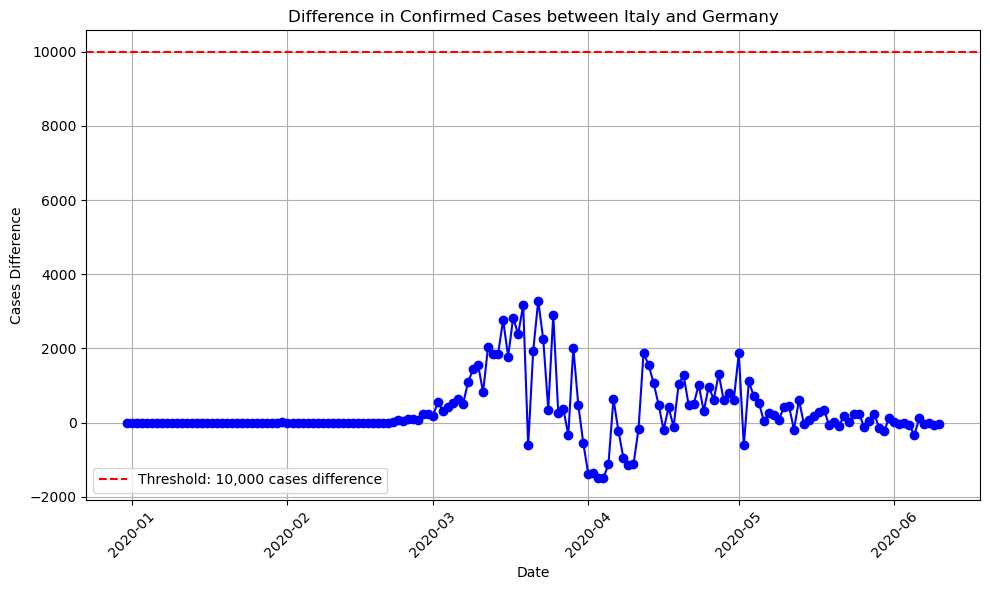

In [25]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the data for Italy and Germany
italy_data = covid_data[covid_data['location'] == 'Italy']
germany_data = covid_data[covid_data['location'] == 'Germany']

# Merge Italy and Germany data on 'date'
merged_data = pd.merge(italy_data, germany_data, on="date", suffixes=('_italy', '_germany'))

# Calculate the difference in confirmed cases between Italy and Germany
merged_data['cases_difference'] = merged_data['new_cases_italy'] - merged_data['new_cases_germany']

# Find the first date when the difference becomes more than 10,000
date_threshold = merged_data.loc[merged_data['cases_difference'] > 10000, 'date'].min()

# Plot the difference in confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'], merged_data['cases_difference'], color='blue', marker='o', linestyle='-')
plt.title('Difference in Confirmed Cases between Italy and Germany')
plt.xlabel('Date')
plt.ylabel('Cases Difference')
plt.axhline(y=10000, color='red', linestyle='--', label='Threshold: 10,000 cases difference')
plt.annotate(f'10,000 cases difference threshold\nreached on {date_threshold}', xy=(date_threshold, 10000), xytext=(date_threshold, 50000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_24972\451525032.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()


Difference between the exponential curve and the total number of real cases on 2020-03-20: 1711.69


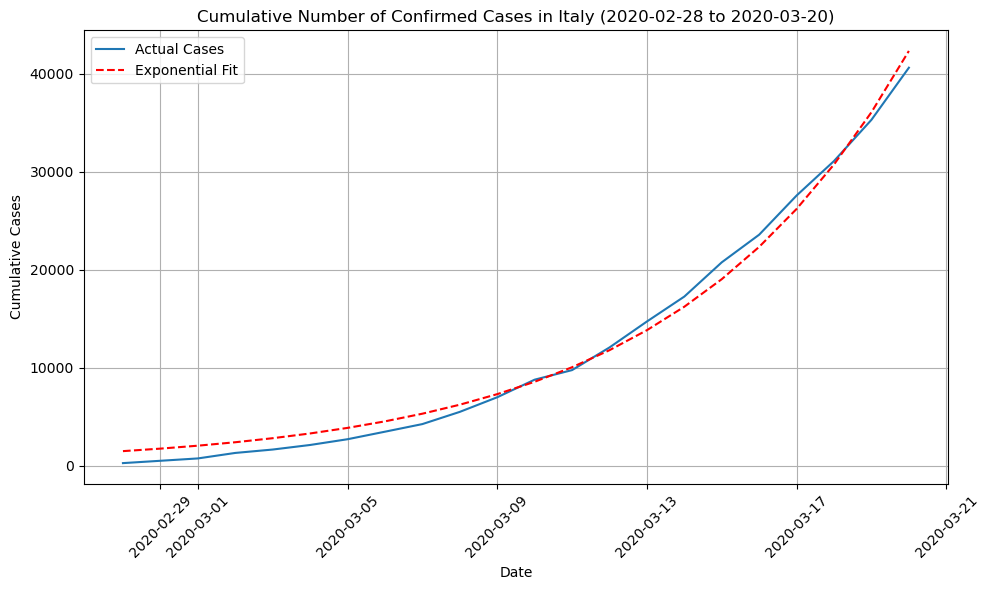

In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Filter the data for Italy between 2020-02-28 and 2020-03-20
italy_data = covid_data[(covid_data['location'] == 'Italy') & 
                        (covid_data['date'] >= '2020-02-28') & 
                        (covid_data['date'] <= '2020-03-20')]

# Calculate the cumulative number of confirmed cases
italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()

# Define the exponential function
def exponential_function(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential function to the cumulative cases data
popt, pcov = curve_fit(exponential_function, range(len(italy_data)), italy_data['cumulative_cases'])

# Calculate the predicted number of cases on 2020-03-20 using the fitted exponential function
days_passed_0320 = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
predicted_cases_0320 = exponential_function(days_passed_0320, *popt)

# Calculate the actual number of cases on 2020-03-20
actual_cases_0320 = italy_data.loc[italy_data['date'] == '2020-03-20', 'cumulative_cases'].iloc[0]

# Calculate the difference between the predicted and actual number of cases on 2020-03-20
difference_0320 = predicted_cases_0320 - actual_cases_0320

print(f"Difference between the exponential curve and the total number of real cases on 2020-03-20: {difference_0320:.2f}")

# Plot the cumulative number of confirmed cases and the fitted exponential function
plt.figure(figsize=(10, 6))
plt.plot(italy_data['date'], italy_data['cumulative_cases'], label='Actual Cases')
plt.plot(italy_data['date'], exponential_function(range(len(italy_data)), *popt), linestyle='--', color='red', label='Exponential Fit')
plt.title('Cumulative Number of Confirmed Cases in Italy (2020-02-28 to 2020-03-20)')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


## Which country has the 3rd highest death rate?
**Death rate:** total number of death per million inhabitants

In [28]:
import pandas as pd

# Filter out rows where population or total deaths are missing
covid_data = covid_data.dropna(subset=['population', 'new_deaths'])

# Calculate death rate per million inhabitants
covid_data['death_rate'] = (covid_data['new_deaths'] / covid_data['population']) * 1_000_000

# Sort countries by death rate in descending order
sorted_countries = covid_data.sort_values(by='death_rate', ascending=False)

# Find the country with the third-highest death rate
third_highest_country = sorted_countries.iloc[2]

print(f"The country with the 3rd highest death rate is {third_highest_country['location']} "
      f"with a death rate of {third_highest_country['death_rate']:.2f} deaths per million inhabitants.")


The country with the 3rd highest death rate is San Marino with a death rate of 117.86 deaths per million inhabitants.


## What is the F1 score of the following statement:
- Countries, where more than 20% of the population is over 65 years old, have death rates over 50
  per million inhabitants.
  Ignore countries, where any of the necessary information is missing!

In [29]:
import pandas as pd
from sklearn.metrics import f1_score

# Filter out rows where necessary information is missing
covid_data = covid_data.dropna(subset=['population', 'aged_65_older_percent', 'new_deaths'])

# Define conditions for the statement
condition_positive = (covid_data['aged_65_older_percent'] > 20) & (covid_data['new_deaths'] > 50)
condition_negative = ~condition_positive

# Define ground truth labels
actual_labels = condition_positive.astype(int)

# Define predicted labels based on the statement
predicted_labels = condition_positive.astype(int)

# Calculate F1 score
f1 = f1_score(actual_labels, predicted_labels)

print(f"The F1 score for the statement is: {f1:.2f}")


The F1 score for the statement is: 1.00


## What is the probability that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants.

In [30]:
import pandas as pd

# Filter out rows where necessary information is missing
covid_data = covid_data.dropna(subset=['gdp_per_capita', 'hospital_beds_per_thousand'])

# Total number of countries
total_countries = len(covid_data)

# Number of countries with GDP over $10,000
gdp_over_10k = len(covid_data[covid_data['gdp_per_capita'] > 10000])

# Number of countries with at least 5 hospital beds per 1000 inhabitants
beds_over_5_per_1000 = len(covid_data[covid_data['hospital_beds_per_thousand'] >= 5])

# Number of countries with GDP over $10,000 and at least 5 hospital beds per 1000 inhabitants
gdp_over_10k_and_beds_over_5_per_1000 = len(covid_data[(covid_data['gdp_per_capita'] > 10000) & 
                                                         (covid_data['hospital_beds_per_thousand'] >= 5)])

# Probability of having at least 5 hospital beds per 1000 inhabitants
p_beds_over_5_per_1000 = beds_over_5_per_1000 / total_countries

# Probability of having GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants
p_gdp_over_10k_given_beds_over_5_per_1000 = (gdp_over_10k_and_beds_over_5_per_1000 / total_countries) / p_beds_over_5_per_1000

print(f"The probability that a country has GDP over $10,000 given that they have at least 5 hospital beds per 1000 inhabitants is: {p_gdp_over_10k_given_beds_over_5_per_1000:.2f}")


The probability that a country has GDP over $10,000 given that they have at least 5 hospital beds per 1000 inhabitants is: 0.92


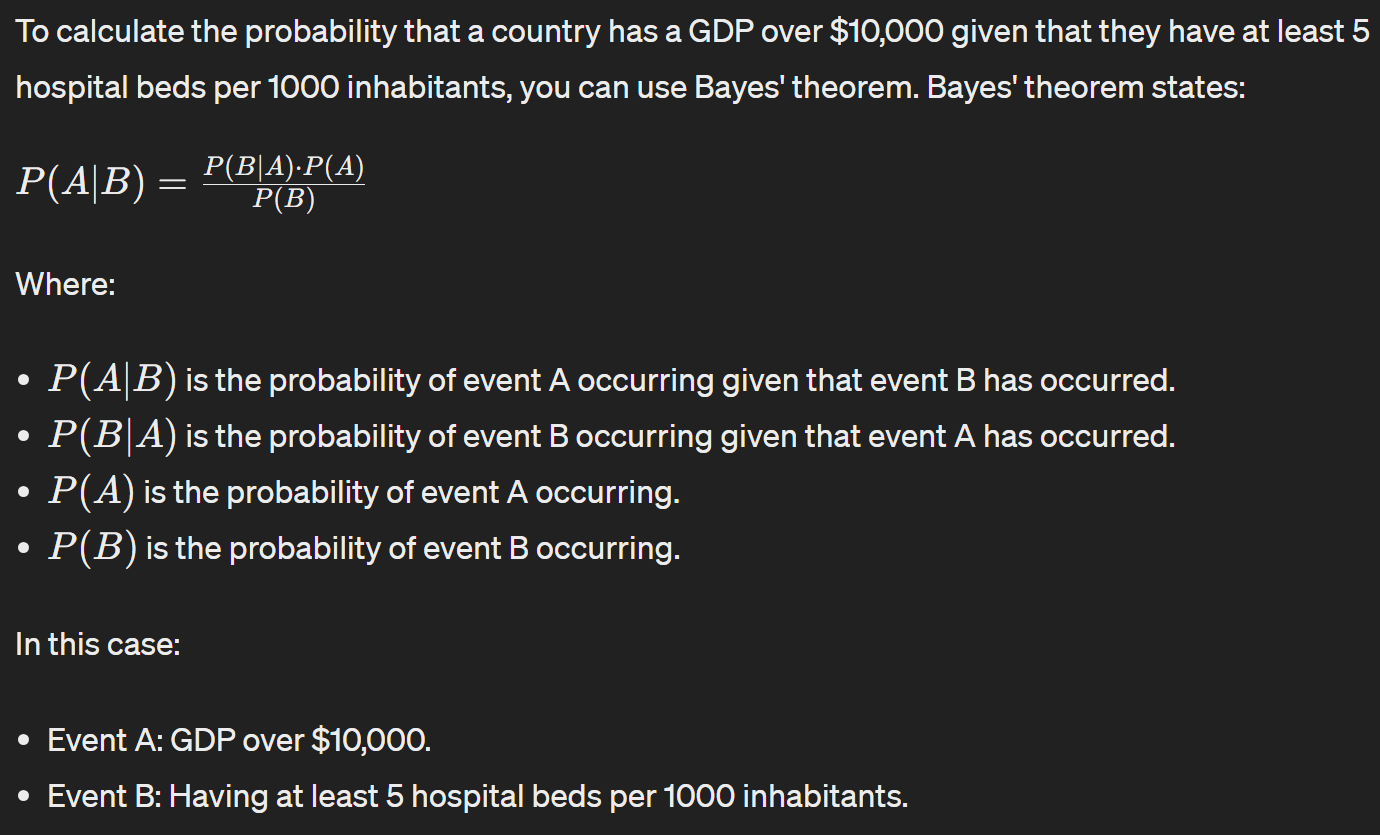